In [1]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

In [2]:
dataset = pd.read_csv("data2/Salary.csv", sep = ",", skipinitialspace=True)
dataset.columns
dataset.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior
0,32.0,Male,1,Software Engineer,5.0,90000.0,UK,White,0
1,28.0,Female,2,Data Analyst,3.0,65000.0,USA,Hispanic,0
2,45.0,Male,3,Manager,15.0,150000.0,Canada,White,1
3,36.0,Female,1,Sales Associate,7.0,60000.0,USA,Hispanic,0
4,52.0,Male,2,Director,20.0,200000.0,USA,Asian,0


In [3]:
# print important information about dataset
print("#Total of samples = ", dataset.shape[0])
print("#Features = ", dataset.shape[1])

#Total of samples =  6684
#Features =  9


In [4]:
# checking the missing values
print(dataset.isnull().sum())
dataset[dataset.eq("?").any(axis=1)].head()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
Country                0
Race                   0
Senior                 0
dtype: int64


,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior


There are no missing values in original dataset

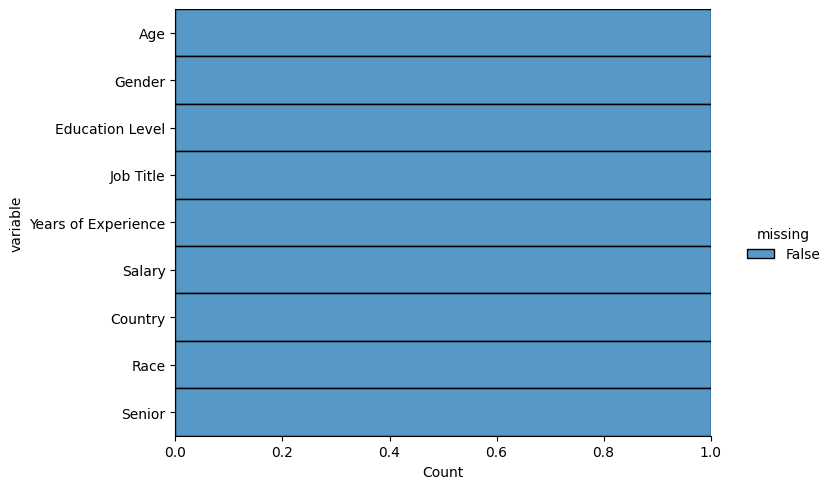

In [5]:
# plot missing data
sbn.displot(
    data = dataset.isna().melt(value_name="missing"),
    y = "variable",
    hue = "missing",
    multiple = "fill",
    aspect = 1.5
)

plt.show()

In [6]:
dataset = dataset.dropna()
print("#Total samples without missing values = ", len(dataset))

#Total samples without missing values =  6684


In [7]:
dataset.columns

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary', 'Country', 'Race', 'Senior'],
      dtype='object')

In [8]:
numerical_cols =  ['Age',  'Education Level',  'Years of Experience',
       'Salary']

In [9]:
dataset.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior
0,32.0,Male,1,Software Engineer,5.0,90000.0,UK,White,0
1,28.0,Female,2,Data Analyst,3.0,65000.0,USA,Hispanic,0
2,45.0,Male,3,Manager,15.0,150000.0,Canada,White,1
3,36.0,Female,1,Sales Associate,7.0,60000.0,USA,Hispanic,0
4,52.0,Male,2,Director,20.0,200000.0,USA,Asian,0


Histogram with Frequencies

In [10]:
# function to plot distribution for 1 numerical column
def hist_frequencies(data, column, bins):
    sbn.histplot(data[column], color = "blue", bins = bins)
    plt.xlabel(column)
    plt.ylabel("Frequencies")
    plt.title("Histogram distribution for " + column)    
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

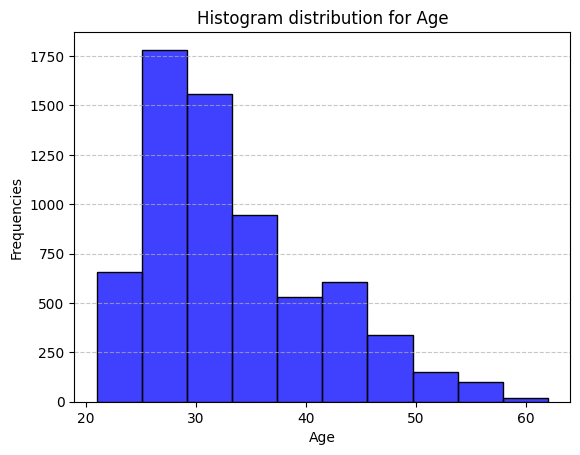

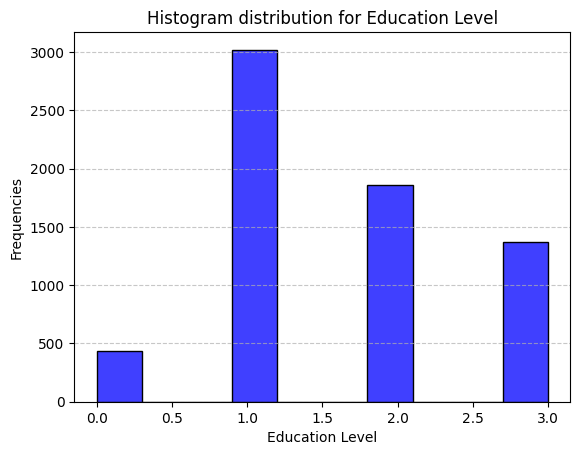

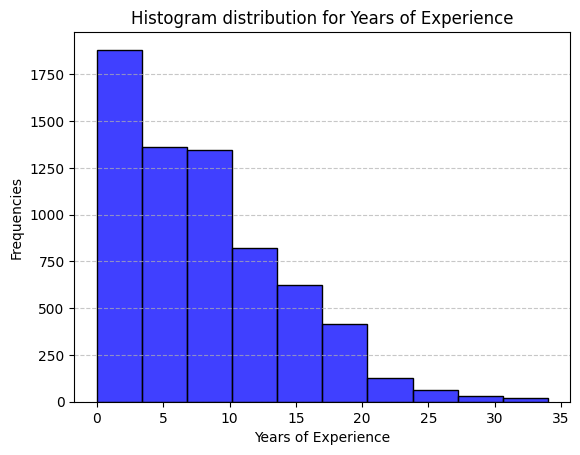

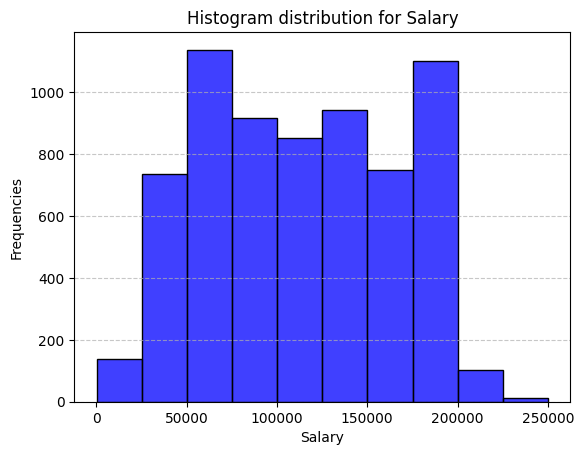

In [11]:
# plot the distribution for each numerical column
for col in numerical_cols:
    hist_frequencies(dataset, col, 10) 

it shows:
-that mostrepresented age is 25-29 years
-most people in dataset have bachelor degree
-only a tiny bit of people have many years of experience
-salary is distributed almost evenly 

Histogram with Densities and KDE line (kernel density estimate)

In [12]:
# function to plot distribution for 1 numerical column
def hist_density(data, column, bins):
    sbn.histplot(data[column], color = "blue", bins = bins, kde = False, stat = "density", alpha = 0.5)
    sbn.kdeplot(data[column], color = "red", linewidth = 2)
    plt.xlabel(column)
    plt.ylabel("Density")
    plt.title("Histogram and KDE for " + column)    
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

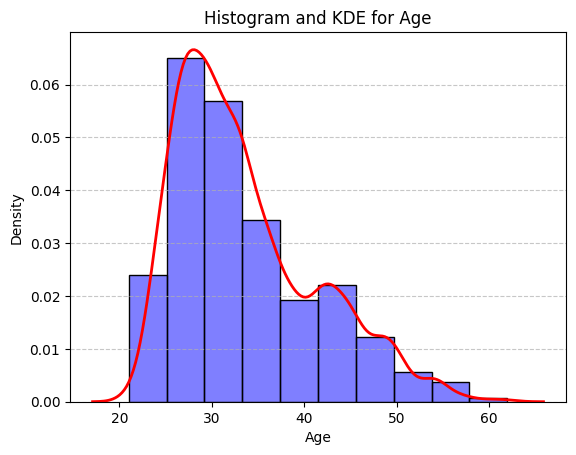

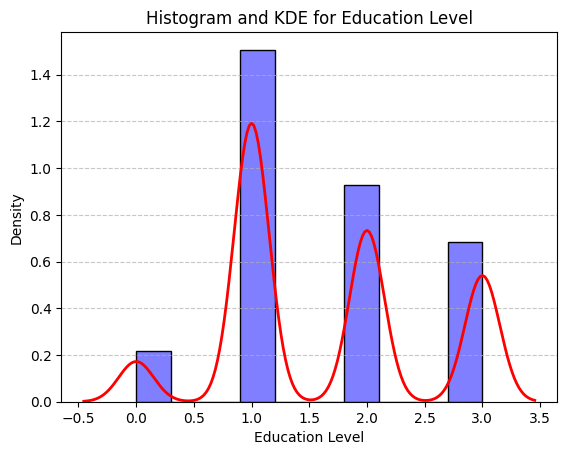

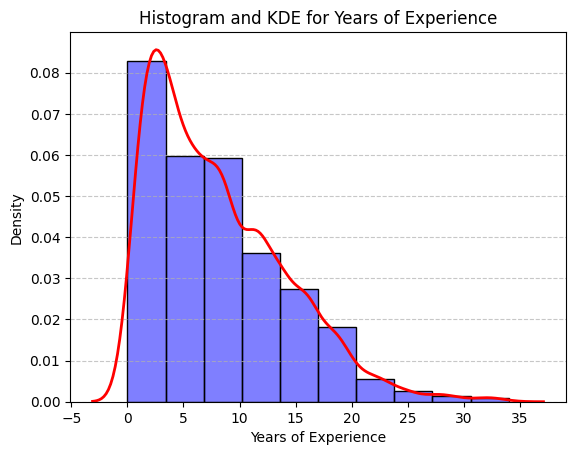

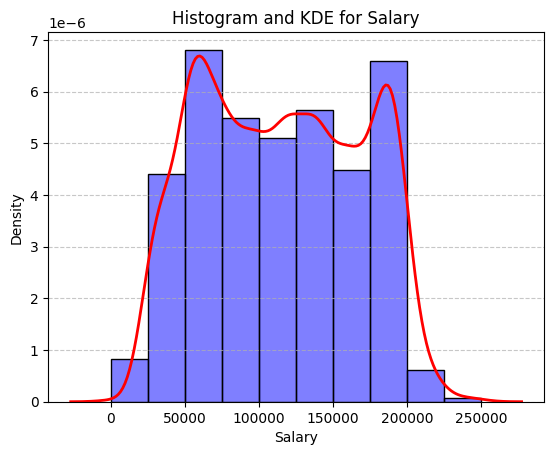

In [13]:
# plot the distribution for each numerical column
for col in numerical_cols:
    hist_density(dataset, col, 10)

Box Plot

In [14]:
# function to make boxplot
def statistics_nvar(data, numerical_cols):
    # calculate the nrows and ncols for plots
    ncol_plots = 3
    nrow_plots = (len(numerical_cols) + ncol_plots - 1) // ncol_plots
    # create the subplots for specific row and column
    fig, axs = plt.subplots(nrow_plots, ncol_plots, figsize = (16, 4 * nrow_plots))
    axs = axs.flatten()
    # create boxplots for each numerical column
    for i, col in enumerate(numerical_cols):
        sbn.boxplot(data[col], ax = axs[i])
        axs[i].set_title("Box plot for " + col)
    plt.tight_layout()
    plt.show()

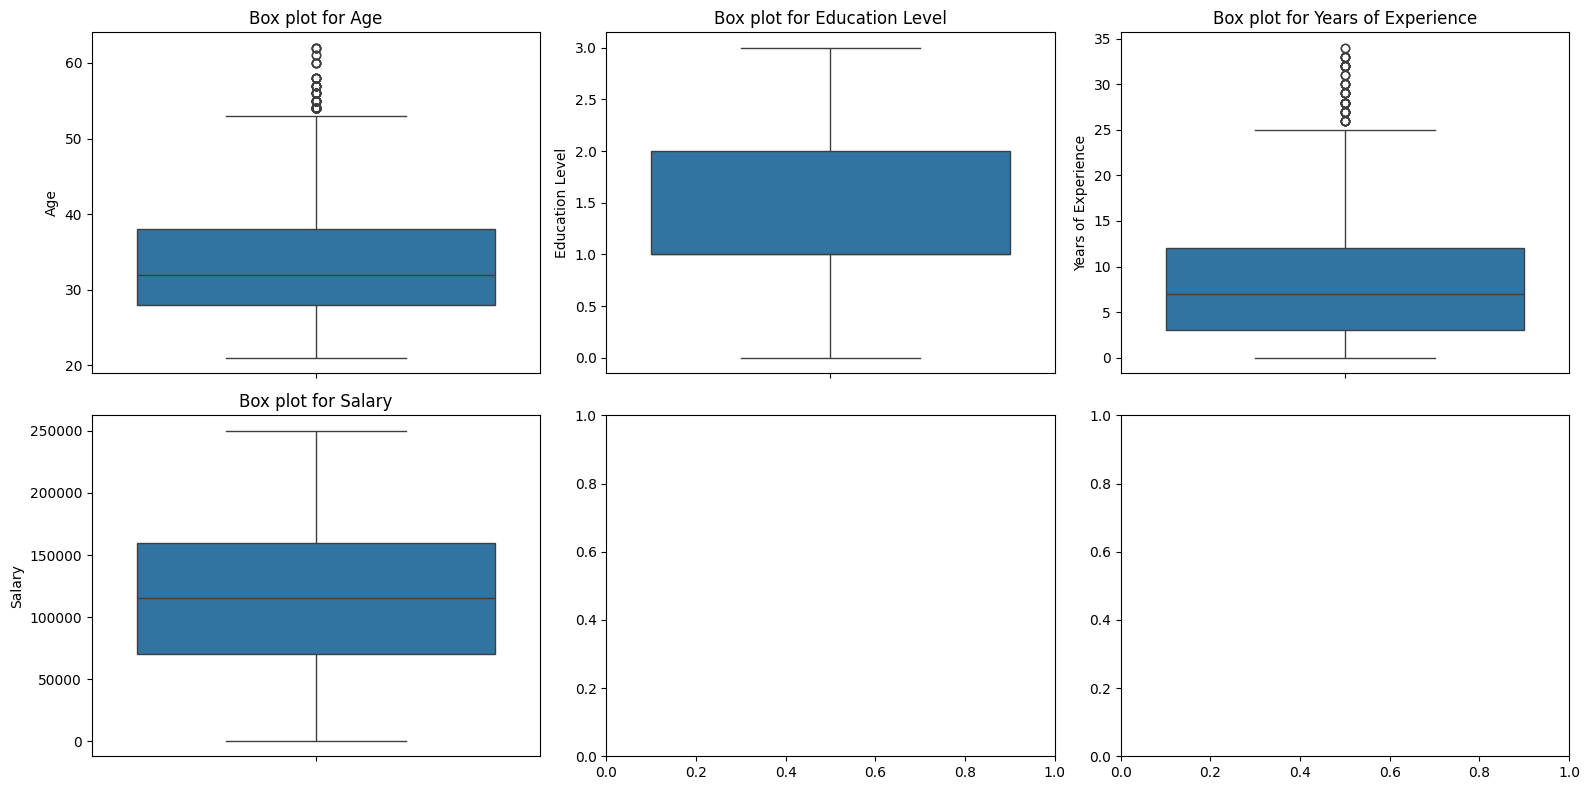

In [15]:
# boxplot for each numerical column
statistics_nvar(dataset, numerical_cols)

We can see that dataset does not have a lot of outliers. Only some old people with many years of experience

Statistical metrics

In [16]:
# statistical information about numerical variables
dataset[numerical_cols].describe()

,Age,Education Level,Years of Experience,Salary
count,6684.000000,6684.000000,6684.000000,6684.000000
mean,33.610563,1.622382,8.077723,115307.175194
std,7.595994,0.880474,6.029305,52806.810881
min,21.000000,0.000000,0.000000,350.000000
25%,28.000000,1.000000,3.000000,70000.000000
50%,32.000000,1.000000,7.000000,115000.000000
75%,38.000000,2.000000,12.000000,160000.000000
max,62.000000,3.000000,34.000000,250000.000000


In [17]:
def plot_correlation2(data, cols):
    # Корреляционная матрица
    corr = data[cols].corr()
    
    # Построение тепловой карты
    plt.figure(figsize=(10, 8))
    sbn.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", square=True)
    plt.title("Correlation Analysis")
    plt.show()
    

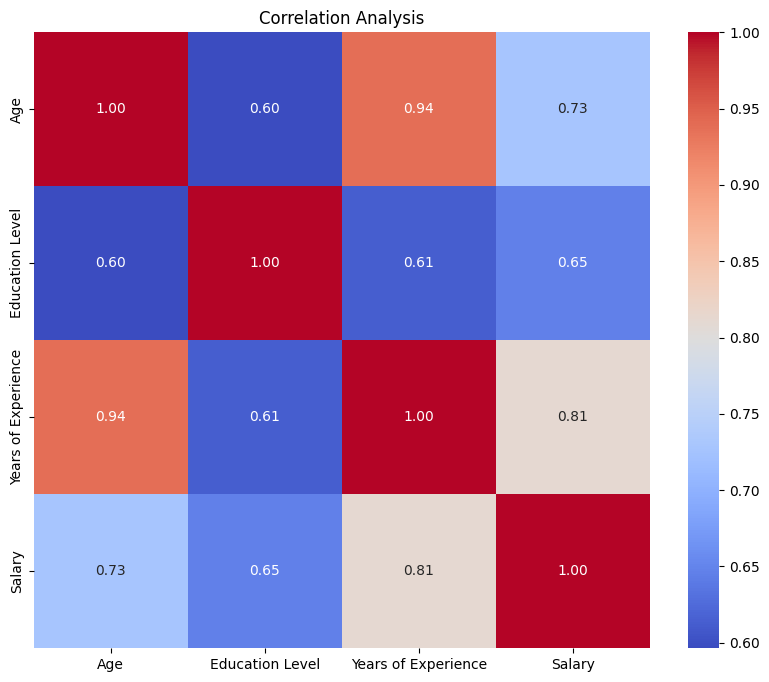

In [18]:
plot_correlation2(dataset, numerical_cols)

This heatmap shows obvious correlations between numerical columns, as for:
-the older a person is, the more years of experience he has
-people with a lot of experience usually have bigger salaries
-young people tend to have lower education level than older
and others.
We can see that pretty all columns here are dependant

In [19]:
from scipy import stats

# Function for outliers detection based on percentiles
def outliers_detection(dataset, col, lower_percentile=2.275, upper_percentile=97.725):
    # Calculate the percentiles
    lower_bound = dataset[col].quantile(lower_percentile / 100)
    upper_bound = dataset[col].quantile(upper_percentile / 100)
    
    # Filter out the outliers
    outliers = dataset[(dataset[col] < lower_bound) | (dataset[col] > upper_bound)]
    
    return outliers

In [20]:
# cycle to check the number of outliers in each numerical column
for col in numerical_cols:
    print("\n*** Outliers detection in " + col + " ***")
    lst_outliers = outliers_detection(dataset, col)
    print(f"#samples outlier to distribution = {len(lst_outliers)}")
    print(f"%outliers = {round(100* len(lst_outliers)/len(dataset), 2)} %")


*** Outliers detection in Age ***
#samples outlier to distribution = 288
%outliers = 4.31 %

*** Outliers detection in Education Level ***
#samples outlier to distribution = 0
%outliers = 0.0 %

*** Outliers detection in Years of Experience ***
#samples outlier to distribution = 270
%outliers = 4.04 %

*** Outliers detection in Salary ***
#samples outlier to distribution = 251
%outliers = 3.76 %


In [21]:
# list of categorical variables
# stress_relief_activities should be proccesed alone, beacuse it is bacically an array of data
categorical_vars = list(set(dataset.columns) - set(numerical_cols))
categorical_vars

['Country', 'Job Title', 'Senior', 'Gender', 'Race']

In [22]:
# cycle to calculate number of instances in each categorical column
for col in categorical_vars:
    print("\n***** " + col + " ******")
    print(dataset[col].value_counts())


***** Country ******
Country
USA          1356
China        1339
Australia    1335
UK           1332
Canada       1322
Name: count, dtype: int64

***** Job Title ******
Job Title
Software Engineer                 809
Data Scientist                    515
Data Analyst                      391
Software Engineer Manager         376
Product Manager                   323
                                 ... 
Customer Support Specialist         1
VP of Finance                       1
Director of Product Management      1
CEO                                 1
Human Resources Director            1
Name: count, Length: 129, dtype: int64

***** Senior ******
Senior
0    5725
1     959
Name: count, dtype: int64

***** Gender ******
Gender
Male      3671
Female    3013
Name: count, dtype: int64

***** Race ******
Race
White               1957
Asian               1599
Korean               457
Australian           452
Chinese              443
Black                435
African American     352
Mixed 

Bar chart - Analysis of absolute frequencies

In [23]:
# function to plot bar chart for absolute frequencies in 1 categorical column
def plot_barchart(dataset, col):
    results = dataset[col].value_counts()
    sbn.barplot(x = results.values.tolist(), y = results.index.tolist(), orient = "y")
    plt.title("Statistical analysis by " + col)
    plt.show()

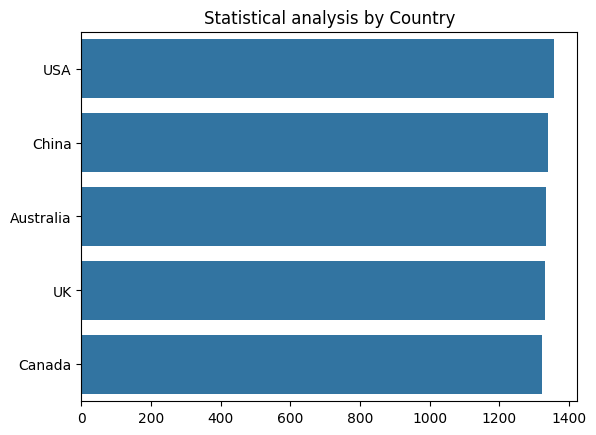

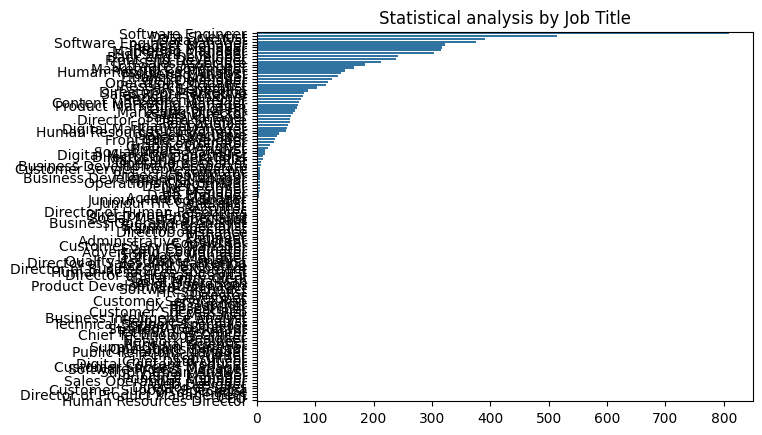

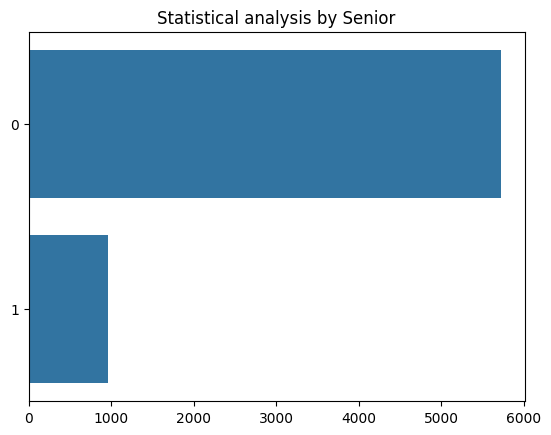

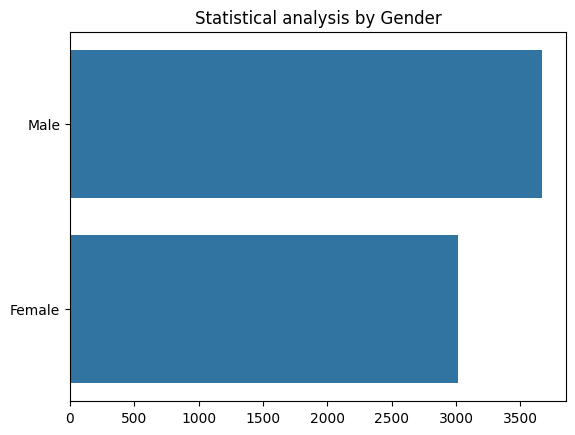

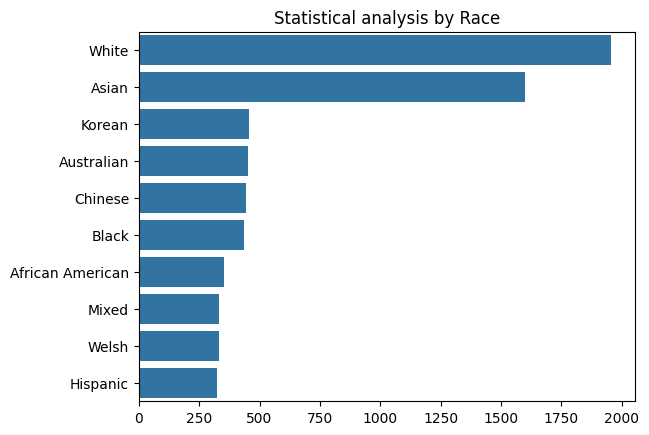

In [24]:
# cycle to plot bar chart for each categorical column
for col in categorical_vars:
    plot_barchart(dataset, col)

 from this charts we can see that:
 -most people do not have a senior position
 -2 most representated races in dataset are white and asian by a huge margin
 -there are a lot of different jobs in dataset
 -genders are almost equally representated in dataset
 

Pie Chart - Analysis of relative frequencies

In [25]:
# function to plot pie chart for relative frequencies in 1 categorical column
def plot_piechart(dataset, col):
    # count the #samples for each categogy
    results = dataset[col].value_counts()
    # calculate the relative frequencies
    total_samples = results.sum()
    rel_freq = results/total_samples
    sbn.set_style("whitegrid")
    plt.figure(figsize=(6,6))
    plt.pie(rel_freq.values.tolist(), labels = rel_freq.index.tolist(), autopct='%1.1f%%')
    plt.title("Relative frequency analysis by " + col)
    plt.show()

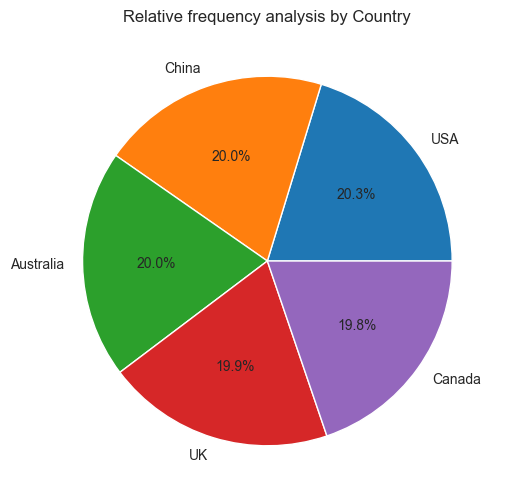

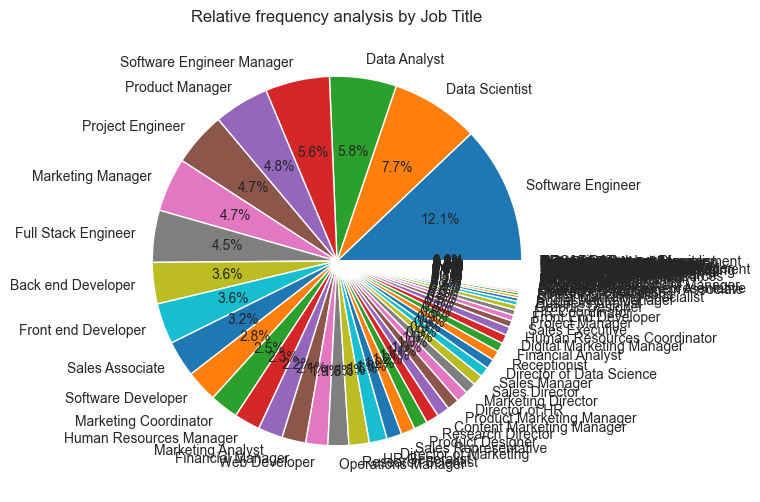

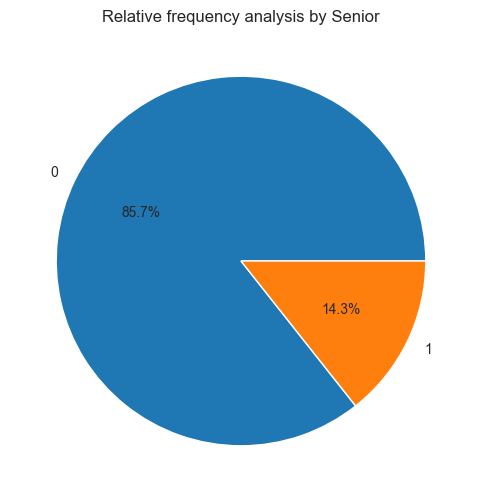

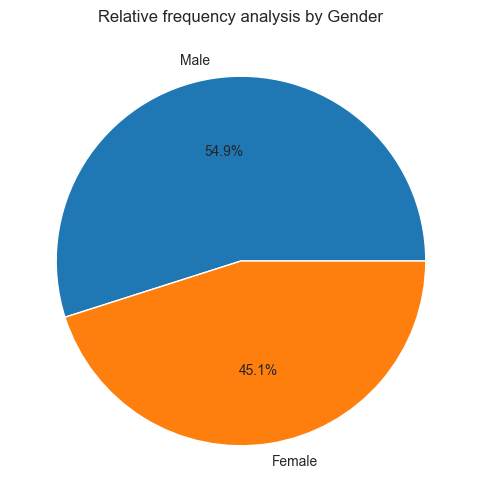

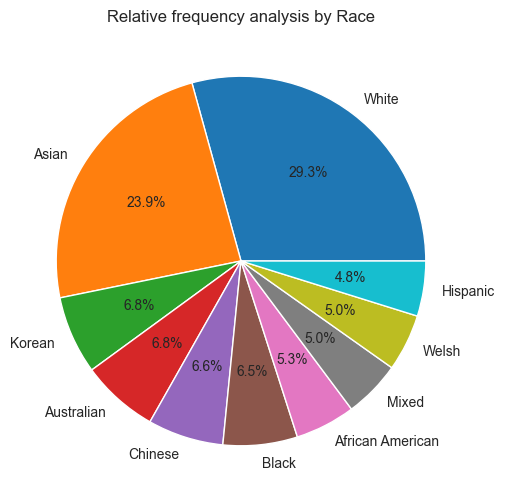

In [26]:
# cycle to plot pie chart for each categorical column
for col in categorical_vars:
    plot_piechart(dataset, col)

Pie charts give us prrety much the same information as bar charts (excluding the absolute amount) but in a slightly more convinient way

Statistical Analysis for subgroups


In [27]:
# create groups organized by country and race
g1="Gender"
g2="Senior"
group = dataset.groupby([g1,g2 ]).size().reset_index(name = "samples")
print(group)

   Gender  Senior  samples
0  Female       0     2626
1  Female       1      387
2    Male       0     3099
3    Male       1      572


In [28]:
# function to plot absolute frequencies for groups
def plot_absfreq_groups(group, g1, g2):
    sbn.barplot(data = group, x = g1, y = "samples", hue = g2, palette = "pastel")
    plt.xlabel('Sex')
    plt.ylabel('Absolute Frequencies')
    plt.title('Bar Chart of Absolute Frequencies by Gender and Senior position')
    plt.tight_layout()
    plt.show()

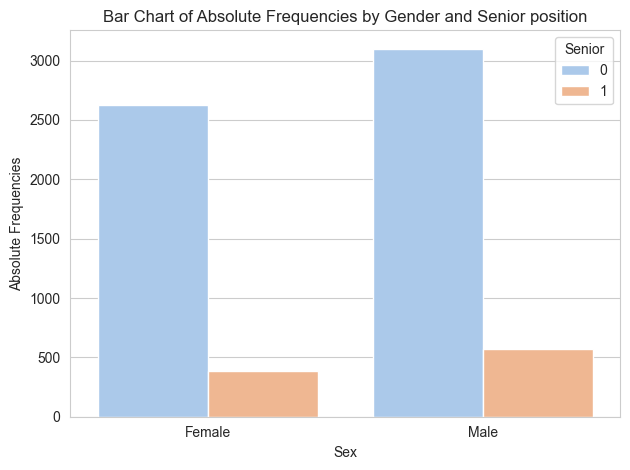

In [29]:
plot_absfreq_groups(group, g1,g2 )

absolute amount of males with and without senior position is higher than females

In [30]:
# function to plot relative frequencies for groups
def plot_relfreq_groups(group, g1, g2):
    labels = group[g1] + group[g2].apply(lambda x: " with " if int(x) == 1 else " without ")+"senior position"
    sizes = group["samples"]
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
    plt.axis('equal')
    plt.title('Pie Chart of Relative Frequencies by Gender and Senior position')
    plt.show()

In [31]:
def convert_to_str_senior(senior_int):
     return str(senior_int)  
    
dataset['Senior'] = dataset['Senior'].apply(convert_to_str_senior)

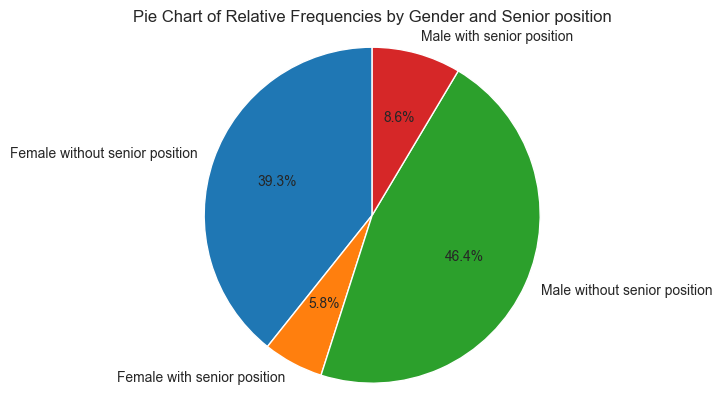

In [32]:
plot_relfreq_groups(group, g1,g2 )

Here we can see relative representation of frequencies by Gender and Senior position

In [33]:
dataset.columns

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary', 'Country', 'Race', 'Senior'],
      dtype='object')

In [34]:
def violin(dataset,g1,g2):
    plt.figure(figsize=(10, 6))
    sbn.violinplot(data=dataset, x=g1, y=g2, hue=g1, palette='pastel')
    plt.title(f'Violin Plot of {g2} Scores by {g1}')
    plt.xlabel(g1)
    plt.ylabel(g2 )
    plt.grid(axis='y')
    plt.show()


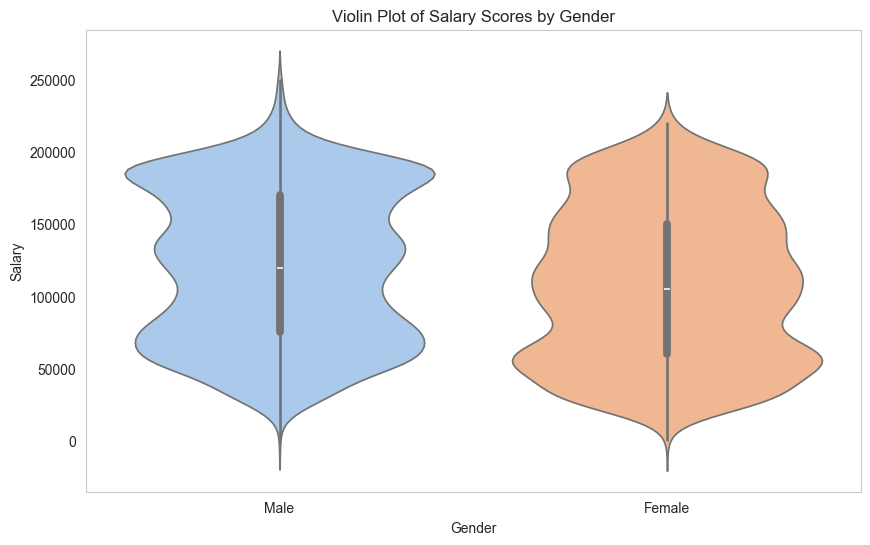

In [35]:
violin(dataset,"Gender","Salary")

This violin plot between categorical and numerical columns shows the distribution of male and female salaries